# Projeto Telecom X: Análise de Evasão de Clientes (Churn)

## 1. Introdução
A Telecom X é uma empresa do setor de telecomunicações que enfrenta um desafio sério: um alto índice de evasão de clientes (churn). A organização percebeu que precisava entender melhor os fatores que levam seus clientes a cancelar os serviços, mas até então não conseguiu encontrar respostas.

E é exatamente aqui que entra este projeto! 👊

Fui contratado como Assistente de Análise de Dados, integrando a equipe de Data Science, para conduzir uma das etapas mais críticas no ciclo de dados: o ETL — Extração, Transformação e Carga, além da Análise Exploratória de Dados (EDA).

# 📌 Extracão

## 2. Importação e Carregamento dos Dados (Fase E - Extração)

### Ressaltamos que neste Notebook, os dados já estão tratados, ou seja, esta é uma versão final do projeto. Caso desejar uma avaliação de todo o processo trabalhado, poderá seguir no Notebook "challenge_telecomx.ipynb".

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

## Paleta de Cores Padrão para Utilização no Projeto TelecomX

In [2]:
# --- Paleta de Cores Padronizada para Telecom (com foco em Churn/Alerta) ---
telecom_colors = {
    'primary_blue': '#007bff',       # Azul principal (usado em ticks, labels, elementos neutros/positivos)
    'secondary_blue': '#1e90ff',     # Dodgerblue (um azul vibrante, para barras gerais, informação)
    'dark_blue': '#0056b3',          # Azul escuro
    'info_blue': '#17a2b8',          # Azul ciano para informações/detalhes
    'light_blue_bar': '#6495ED',     # Azul mais claro para barras (cornflowerblue)

    'churn_alert_red': '#dc3545',    # VERMELHO DE ALERTA (para Churn, perdas, problemas)
    'highlight_yellow': '#FFD700',   # Sugestão: um amarelo dourado para destaque neutro/positivo
    'light_yellow': "#F7EB9E",       # Se preferir um amarelo mais suave/pastel
    'attention_orange': '#ffc107',   # Laranja para atenção/warning
    'success_green': '#28a745',      # Verde para sucesso/positivo

    'dark_text': '#333333',          # Cor padrão para textos escuros
    'medium_gray': '#6c757d',        # Cinza médio para elementos neutros
    'light_gray': '#f8f9fa',         # Cinza muito claro para fundos leves ou bordas
    'white_text': '#FFFFFF',         # Cor para textos claros (em fundos escuros)
    'border_gray': '#CCCCCC',        # Cinza para bordas e grades
    'background_gray': '#EBEBEB'     # Cinza para fundo geral
}


# --- Função para obter cores da paleta ---
def get_telecom_color(color_name):
    """
    Retorna o código hexadecimal da cor da paleta padronizada.

    Args:
        color_name (str): Nome da cor na paleta (ex: 'primary_blue', 'churn_alert_red').

    Returns:
        str: Código hexadecimal da cor.
    """
    return telecom_colors.get(color_name, '#000000') # Retorna preto se a cor não for encontrada

# --- Função para aplicar as configurações de estilo global ---
def apply_global_plot_style():
    """
    Aplica as configurações de estilo global padronizadas aos gráficos Matplotlib.
    """
    plt.rcParams['axes.facecolor'] = get_telecom_color('background_gray')
    plt.rcParams['figure.facecolor'] = get_telecom_color('background_gray')
    plt.rcParams['grid.color'] = get_telecom_color('border_gray')
    plt.rcParams['grid.linewidth'] = 0.5
    plt.rcParams['axes.edgecolor'] = get_telecom_color('border_gray')
    plt.rcParams['xtick.color'] = get_telecom_color('primary_blue')
    plt.rcParams['ytick.color'] = get_telecom_color('primary_blue')
    plt.rcParams['text.color'] = get_telecom_color('dark_text')
    plt.rcParams['axes.labelcolor'] = get_telecom_color('primary_blue')
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.right'] = False

# --- Aplica o estilo global (chamada única) ---
apply_global_plot_style()

print("Paleta de cores e estilo global definidos e aplicados.")

# IMPORTANTE: A partir daqui, você pode carregar seu df_final e realizar os tratamentos.
# Exemplo: df_final = pd.read_csv('seu_arquivo_de_dados.csv')

Paleta de cores e estilo global definidos e aplicados.


In [3]:
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X/base_dados/df_final.json'

In [4]:
df_final = pd.read_json(url)
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureGroup,DailyCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0-12 Meses,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0-12 Meses,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0-12 Meses,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,13-24 Meses,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,0-12 Meses,2.796667


# 🔧 Transformação

## 3. Características Gerais da Base de Dados e Tratamento (Fase T - Transformação)

### 3.1. Conhecendo o tamanho do Dataframe

In [5]:
# Retorna uma tupla com o número de linhas e colunas.
df_final.shape

(7032, 23)

### 3.2. Conhecendo as Colunas do Dataframe

In [6]:
# Lista os nomes de todas as colunas.
df_final.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'TenureGroup', 'DailyCharges'],
      dtype='object')

### 3.3. Conversão de Tipos de Dados

Durante a fase de transformação e limpeza dos dados, uma etapa crucial foi a conversão de diversas colunas (como gender, Partner, InternetService, Contract, entre outras) para o tipo de dado categórico (category).

O que é o tipo category?
No Pandas, o tipo category é otimizado para colunas que contêm um número limitado e fixo de valores únicos distintos (categorias), como "Sim/Não", "Masculino/Feminino" ou tipos de serviço.

Por que fizemos essa conversão?

Otimização de Memória: Para colunas com muitos valores repetidos, mas poucas categorias únicas, o tipo category armazena os dados de forma muito mais eficiente. Em vez de guardar a string completa para cada linha, ele guarda apenas um código numérico para a categoria e um mapeamento dos códigos para as strings. Isso reduz significativamente o uso de memória RAM do DataFrame, tornando o processamento mais rápido, especialmente com grandes volumes de dados.

Melhora de Performance: Operações como agrupamentos (groupby()), filtragens e contagens são geralmente mais rápidas em colunas categóricas porque o Pandas trabalha com os códigos numéricos subjacentes, que são mais eficientes do que comparar strings.

Preparação para Modelagem: Muitos algoritmos de Machine Learning funcionam melhor ou até exigem que variáveis categóricas sejam tratadas de forma específica (como One-Hot Encoding ou Label Encoding). Converter para category é um passo intermediário que facilita essas transformações futuras, garantindo que o Pandas reconheça essas colunas como nominais ou ordinais, e não como texto livre.

Em resumo, ao converter colunas de texto para o tipo category, garantimos um DataFrame mais eficiente em termos de memória e performance, além de preparar os dados de forma adequada para as próximas etapas de análise e modelagem.

In [28]:
# Lista de colunas a serem convertidas para o tipo 'category'
# Comece com todas as colunas 'object' e depois ajuste se alguma não for categórica.
colunas_categoricas = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in colunas_categoricas:
    if col in df_final.columns: # Garante que a coluna existe no DataFrame
        df_final[col] = df_final[col].astype('category')

# Verifique os tipos de dados novamente para confirmar a conversão
print("\n---")
print("### Informações do DataFrame após Conversão de Tipos Categóricos:")
print(df_final.info())

# Opcional: Para verificar os valores únicos de algumas colunas categóricas
print("\nValores únicos na coluna 'Churn':")
print(df_final['Churn'].unique())
print("\nValores únicos na coluna 'gender':")
print(df_final['gender'].unique())
print("\nContagem de NaNs em 'Churn'")
print(df_final['Churn'].isnull().sum())



---
### Informações do DataFrame após Conversão de Tipos Categóricos:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         7032 non-null   object  
 1   Churn              7032 non-null   category
 2   gender             7032 non-null   category
 3   SeniorCitizen      7032 non-null   int64   
 4   Partner            7032 non-null   category
 5   Dependents         7032 non-null   category
 6   tenure             7032 non-null   int64   
 7   PhoneService       7032 non-null   category
 8   MultipleLines      7032 non-null   category
 9   InternetService    7032 non-null   category
 10  OnlineSecurity     7032 non-null   category
 11  OnlineBackup       7032 non-null   category
 12  DeviceProtection   7032 non-null   category
 13  TechSupport        7032 non-null   category
 14  StreamingTV        7032 non-null   cat

# 📊 Carga e análise

In [23]:
# Filtrar apenas os clientes que evadiram (Churn = 'Yes')
df_churned = df_final[df_final['Churn'] == 'Yes']

In [24]:
df_churned.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureGroup,DailyCharges,SeniorCitizen_Cat
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0-12 Meses,2.463333,Não
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,13-24 Meses,3.266667,Sim
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,0-12 Meses,2.796667,Sim
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,No,Yes,One year,No,Credit card (automatic),62.7,2791.50,25-48 Meses,2.090000,Sim
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,Month-to-month,Yes,Electronic check,25.1,25.10,0-12 Meses,0.836667,Sim


In [25]:
df_churned.shape

(1869, 24)

In [29]:
df_churned.to_json('df_churned.json', index=False)

In [26]:
df_churned.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'TenureGroup', 'DailyCharges', 'SeniorCitizen_Cat'],
      dtype='object')

In [27]:
# --- Cálculo da Taxa de Churn por Tipo de Contrato (para alinhar com o gráfico de barras) ---

print(f"\n--- Taxa de Churn por Tipo de Contrato (Valores do Gráfico) ---")

# Obter os tipos de contrato únicos presentes no DataFrame
contract_types = df_final['Contract'].unique()

for contract_type in contract_types:
    # Contagem total de clientes para este tipo de contrato
    total_clientes_por_contrato = df_final[df_final['Contract'] == contract_type].shape[0]

    # Contagem de clientes que evadiram E tinham este tipo de contrato
    churners_by_contract = df_final[
        (df_final['Churn'] == 'Yes') &
        (df_final['Contract'] == contract_type)
    ].shape[0]

    # Calcular a taxa de churn para este tipo de contrato
    if total_clientes_por_contrato > 0:
        churn_rate_for_contract = (churners_by_contract / total_clientes_por_contrato) * 100
        print(f"\nDetalhes para Contrato '{contract_type}':")
        print(f"Total de clientes com contrato '{contract_type}': {total_clientes_por_contrato}")
        print(f"Clientes que evadiram com contrato '{contract_type}': {churners_by_contract}")
        print(f"Taxa de Evasão (Churn) para '{contract_type}': {churn_rate_for_contract:.1f}%")
    else:
        print(f"\nNão há clientes com contrato '{contract_type}' para calcular a taxa de churn.")

# --- O cálculo da proporção do churn TOTAL por contrato (como no seu código anterior) ---
# pode ser mantido para a anotação do CEO, pois ela se refere à contribuição para o churn total.
# Este é o cálculo que gerou 88.6%, 8.9% e 2.6% do churn TOTAL.

print(f"\n--- Proporção de cada Contrato no CHURN TOTAL (Para anotação do CEO) ---")
total_churners = df_final[df_final['Churn'] == 'Yes'].shape[0]

if total_churners > 0:
    for contract_type in df_final['Contract'].unique():
        churners_by_contract_total = df_final[
            (df_final['Churn'] == 'Yes') &
            (df_final['Contract'] == contract_type)
        ].shape[0]
        percentage_of_total_churn = (churners_by_contract_total / total_churners) * 100
        print(f"Clientes com Contrato '{contract_type}' representam {percentage_of_total_churn:.1f}% do total de clientes que evadiram.")
else:
    print("Não há clientes que evadiram para calcular a proporção do churn total.")


--- Taxa de Churn por Tipo de Contrato (Valores do Gráfico) ---

Detalhes para Contrato 'One year':
Total de clientes com contrato 'One year': 1472
Clientes que evadiram com contrato 'One year': 166
Taxa de Evasão (Churn) para 'One year': 11.3%

Detalhes para Contrato 'Month-to-month':
Total de clientes com contrato 'Month-to-month': 3875
Clientes que evadiram com contrato 'Month-to-month': 1655
Taxa de Evasão (Churn) para 'Month-to-month': 42.7%

Detalhes para Contrato 'Two year':
Total de clientes com contrato 'Two year': 1685
Clientes que evadiram com contrato 'Two year': 48
Taxa de Evasão (Churn) para 'Two year': 2.8%

--- Proporção de cada Contrato no CHURN TOTAL (Para anotação do CEO) ---
Clientes com Contrato 'One year' representam 8.9% do total de clientes que evadiram.
Clientes com Contrato 'Month-to-month' representam 88.6% do total de clientes que evadiram.
Clientes com Contrato 'Two year' representam 2.6% do total de clientes que evadiram.


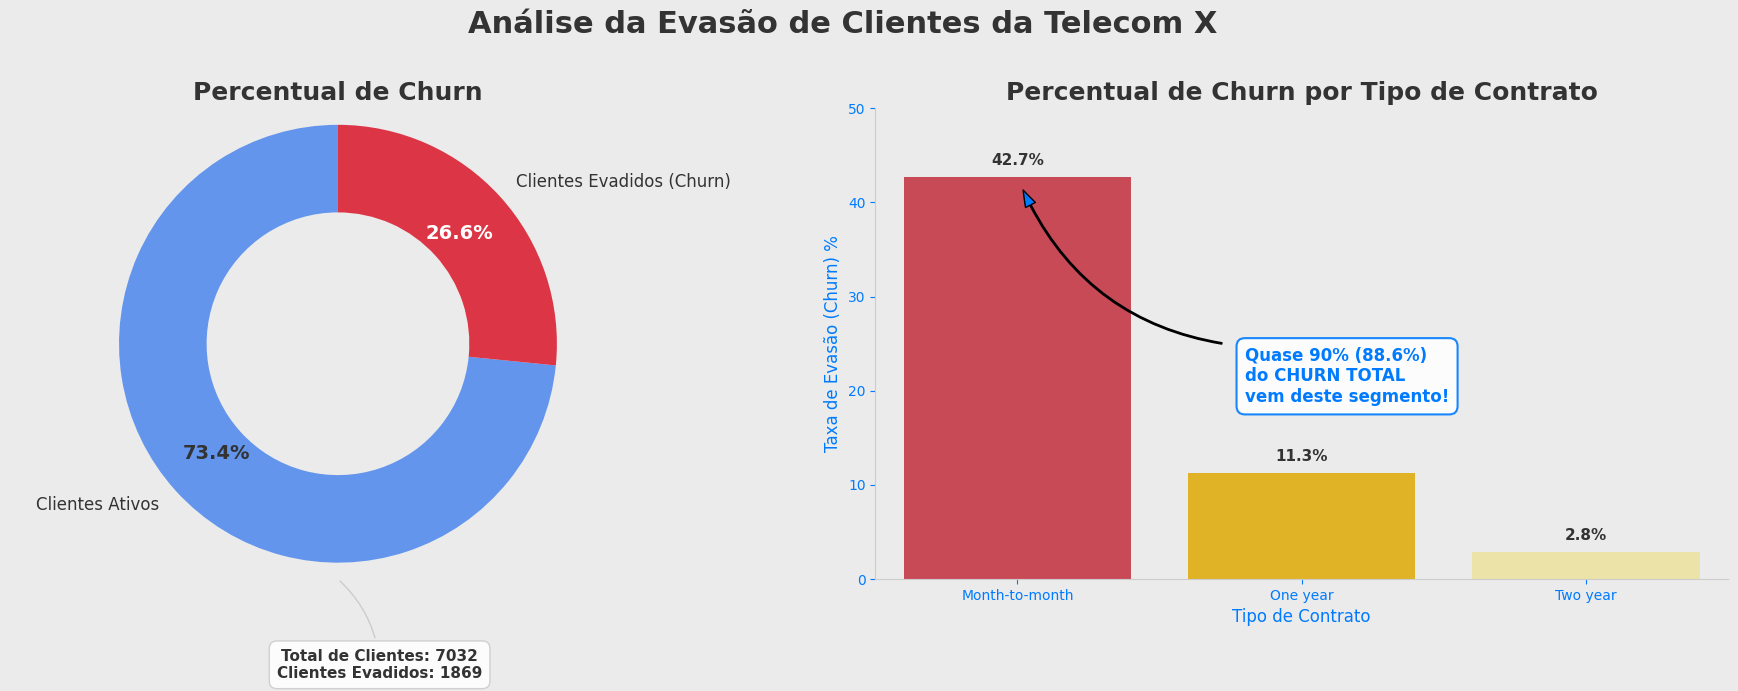

In [14]:
# --- Dados para o Gráfico de Rosca (Volume Total de Clientes) ---
churn_counts = df_final['Churn'].value_counts()
churn_proportions = df_final['Churn'].value_counts(normalize=True) * 100

labels_donut = ['Clientes Ativos', 'Clientes Evadidos (Churn)']
sizes_donut = [churn_proportions['No'], churn_proportions['Yes']]
colors_donut = [get_telecom_color('light_blue_bar'), get_telecom_color('churn_alert_red')]


# --- Dados para o Gráfico de Barras (Churn por Tipo de Contrato) ---
churn_rate_by_contract = df_final.groupby('Contract', observed=False)['Churn'].value_counts(normalize=True).unstack() * 100
churn_rate_yes = churn_rate_by_contract['Yes'].reset_index()
churn_rate_yes.columns = ['Contract', 'Churn_Rate']

churn_rate_yes = churn_rate_yes.sort_values(by='Churn_Rate', ascending=False)

colors_bar = []
for contract in churn_rate_yes['Contract']:
    if contract == 'Month-to-month':
        colors_bar.append(get_telecom_color('churn_alert_red'))
    elif contract == 'Two year':
        colors_bar.append(get_telecom_color('light_yellow'))
    else: # 'One year'
        colors_bar.append(get_telecom_color('attention_orange'))


# --- Cálculo do Impacto do Contrato Mês a Mês no Churn Total ---
total_churners = df_final[df_final['Churn'] == 'Yes'].shape[0]
month_to_month_churners = df_final[(df_final['Churn'] == 'Yes') & (df_final['Contract'] == 'Month-to-month')].shape[0]
percentage_m2m_of_total_churn = (month_to_month_churners / total_churners) * 100


# --- Criar a Figura e os Subplots com Ajuste de Largura ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'width_ratios': [1, 1.3]})

# --- Gráfico 1: Gráfico de Rosca (Visão Geral do Churn) ---
wedges, texts, autotexts = axes[0].pie(
    sizes_donut,
    labels=labels_donut,
    autopct='%1.1f%%',
    colors=colors_donut,
    startangle=90,
    wedgeprops=dict(width=0.4),
    pctdistance=0.75
)

# Ajustar o estilo dos percentuais (dentro)
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')
    autotext.set_color(get_telecom_color('white_text') if autotext.get_text() == f"{churn_proportions['Yes']:.1f}%" else get_telecom_color('dark_text'))

# Ajustar o estilo dos labels (fora)
for text in texts:
    text.set_fontsize(12)
    text.set_color(get_telecom_color('dark_text'))

# Título do gráfico de rosca
axes[0].set_title('Percentual de Churn', fontsize=18, fontweight='bold', color=get_telecom_color('dark_text'))
axes[0].axis('equal')

# --- ADIÇÃO DA MENSAGEM EXTERNA NO GRÁFICO DE ROSCA ---
total_clientes_msg = df_final.shape[0]
clientes_cancelados_msg = df_final['Churn'].value_counts().get('Yes', 0)

message_text = f"Total de Clientes: {total_clientes_msg}\nClientes Evadidos: {clientes_cancelados_msg}"

# Posição para a anotação (ajuste fino pode ser necessário dependendo do figsize e da quantidade de texto)
# Use 'axes fraction' para xy e 'offset points' para xytext para maior flexibilidade
axes[0].annotate(message_text,
                 xy=(0.5, 0), # Ponto de referência na parte inferior central do círculo (dentro dos eixos)
                 xycoords='axes fraction',
                 xytext=(30, -50), # Offset em pontos a partir do xy (30 pontos para direita, 50 para baixo)
                 textcoords='offset points',
                 fontsize=11,
                 color=get_telecom_color('dark_text'),
                 fontweight='bold',
                 ha='center', # Alinhamento horizontal do texto em relação ao xytext
                 va='top',    # Alinhamento vertical do texto em relação ao xytext
                 bbox=dict(boxstyle="round,pad=0.5", fc=get_telecom_color('white_text'),
                           ec=get_telecom_color('border_gray'), lw=1, alpha=0.9),
                 arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.2",
                                 color=get_telecom_color('border_gray')))


# --- Gráfico 2: Gráfico de Barras (Churn por Tipo de Contrato) ---
sns.barplot(x='Contract', y='Churn_Rate', data=churn_rate_yes, palette=colors_bar, ax=axes[1], hue='Contract', legend=False)

# Título do gráfico de barras
axes[1].set_title('Percentual de Churn por Tipo de Contrato', fontsize=18, fontweight='bold', color=get_telecom_color('dark_text'))

axes[1].set_xlabel('Tipo de Contrato', fontsize=12, color=get_telecom_color('primary_blue'))
axes[1].set_ylabel('Taxa de Evasão (Churn) %', fontsize=12, color=get_telecom_color('primary_blue'))
axes[1].set_ylim(0, 50)

# Adicionar os valores percentuais em cima das barras
for index, row in churn_rate_yes.iterrows():
    axes[1].text(index, row['Churn_Rate'] + 1, f"{row['Churn_Rate']:.1f}%",
                 color=get_telecom_color('dark_text'), ha="center", va='bottom', fontsize=11, fontweight='bold')

# --- Anotação para o CEO ---
m2m_index_pos = churn_rate_yes[churn_rate_yes['Contract'] == 'Month-to-month'].index[0]
m2m_churn_rate_val = churn_rate_yes.loc[m2m_index_pos, 'Churn_Rate']

axes[1].annotate(f'Quase 90% ({percentage_m2m_of_total_churn:.1f}%) \ndo CHURN TOTAL \nvem deste segmento!',
                 xy=(m2m_index_pos, m2m_churn_rate_val),
                 xytext=(m2m_index_pos + 0.8, m2m_churn_rate_val - 18),
                 arrowprops=dict(facecolor=get_telecom_color('primary_blue'), shrink=0.05, width=1, headwidth=8,
                                 connectionstyle="arc3,rad=-0.3"),
                 horizontalalignment='left',
                 verticalalignment='top',
                 fontsize=12, color=get_telecom_color('primary_blue'), fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.5", fc=get_telecom_color('white_text'),
                           ec=get_telecom_color('primary_blue'), lw=1.5, alpha=0.9))

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.suptitle('Análise da Evasão de Clientes da Telecom X', fontsize=22, fontweight='bold', color=get_telecom_color('dark_text'), y=0.98)
plt.show()

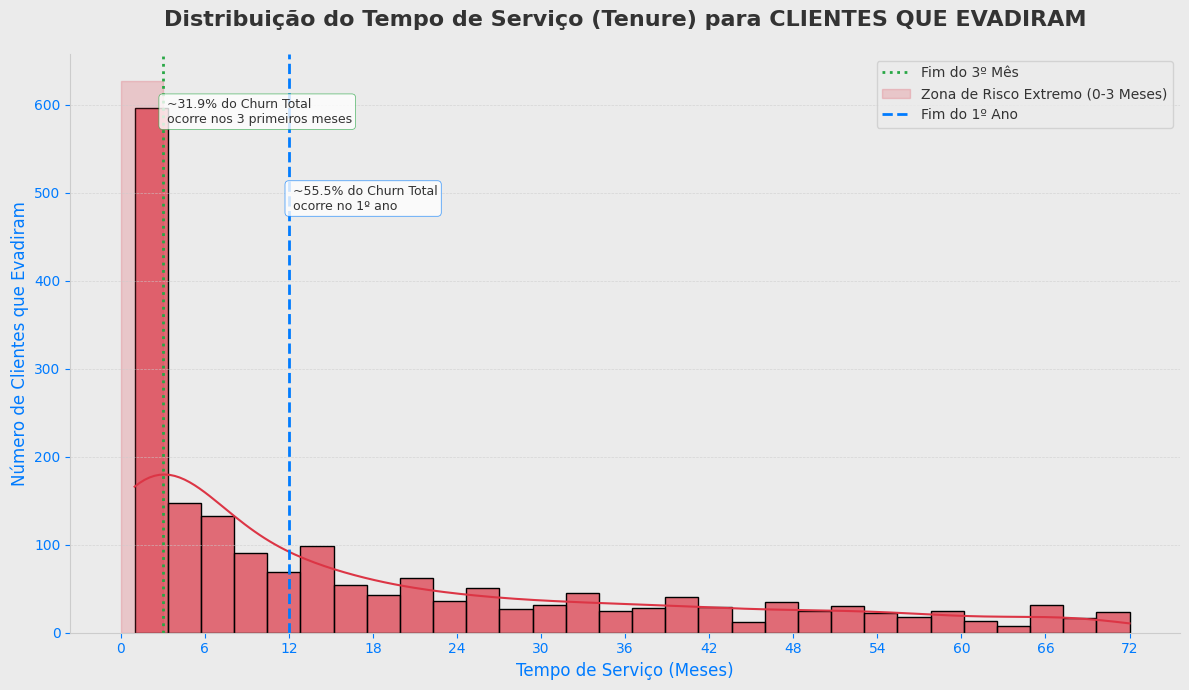

In [15]:
# --- Bloco do Gráfico de Distribuição de Tenure ---

# Filtrar apenas os clientes que evadiram (Churn = 'Yes')
df_churned = df_final[df_final['Churn'] == 'Yes']

plt.figure(figsize=(12, 7))
sns.histplot(data=df_churned, x='tenure', bins=30, kde=True,
             color=get_telecom_color('churn_alert_red'), alpha=0.7)

# Calcular percentagens para anotações
total_churners = len(df_churned)
churners_0_3_months = df_churned[df_churned['tenure'] <= 3].shape[0]
percent_churn_0_3_months = (churners_0_3_months / total_churners) * 100

churners_0_12_months = df_churned[df_churned['tenure'] <= 12].shape[0]
percent_churn_0_12_months = (churners_0_12_months / total_churners) * 100

# Adicionar linha e área para os primeiros 3 meses (zona de risco extremo)
plt.axvline(x=3, color=get_telecom_color('success_green'), linestyle=':', linewidth=2, label='Fim do 3º Mês')
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=0, x2=3,
                  color=get_telecom_color('churn_alert_red'), alpha=0.2,
                  label='Zona de Risco Extremo (0-3 Meses)')

# Adicionar linha para 12 meses
plt.axvline(x=12, color=get_telecom_color('primary_blue'), linestyle='--', linewidth=2, label='Fim do 1º Ano')

# Posicionar as anotações inteligentemente
max_y_val = plt.gca().get_ylim()[1]

# Anotação para 0-3 meses
plt.text(x=3, y=max_y_val * 0.9,
         s=f' ~{percent_churn_0_3_months:.1f}% do Churn Total\n ocorre nos 3 primeiros meses',
         color=get_telecom_color('dark_text'),
         ha='left', va='center',
         bbox=dict(boxstyle="round,pad=0.3", fc=get_telecom_color('white_text'),
                   ec=get_telecom_color('success_green'), lw=0.5, alpha=0.8),
         fontsize=9)

# Anotação para 0-12 meses (ajustar posição para não sobrepor)
plt.text(x=12, y=max_y_val * 0.75,
         s=f' ~{percent_churn_0_12_months:.1f}% do Churn Total\n ocorre no 1º ano',
         color=get_telecom_color('dark_text'),
         ha='left', va='center',
         bbox=dict(boxstyle="round,pad=0.3", fc=get_telecom_color('white_text'),
                   ec=get_telecom_color('primary_blue'), lw=0.5, alpha=0.8),
         fontsize=9)


plt.title('Distribuição do Tempo de Serviço (Tenure) para CLIENTES QUE EVADIRAM',
          fontsize=16, weight='bold', pad=20, color=get_telecom_color('dark_text'))
plt.xlabel('Tempo de Serviço (Meses)', fontsize=12, color=get_telecom_color('primary_blue'))
plt.ylabel('Número de Clientes que Evadiram', fontsize=12, color=get_telecom_color('primary_blue'))
plt.xticks(range(0, int(df_final['tenure'].max()) + 1, 6))
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

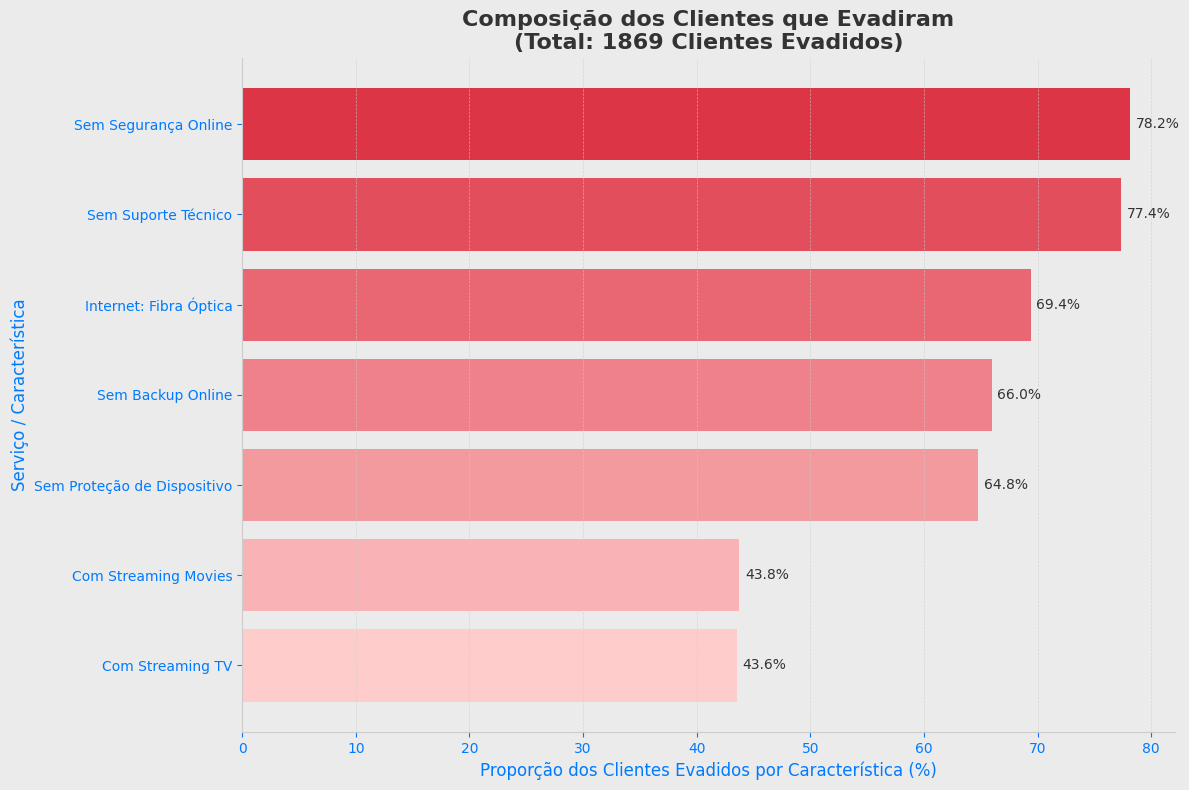

In [16]:
# Total de clientes evadidos
total_churn = df_churned.shape[0]

# Mapeando características específicas
caracteristicas = {
    'Sem Suporte Técnico': (df_churned['TechSupport'] == 'No'),
    'Sem Segurança Online': (df_churned['OnlineSecurity'] == 'No'),
    'Sem Backup Online': (df_churned['OnlineBackup'] == 'No'),
    'Sem Proteção de Dispositivo': (df_churned['DeviceProtection'] == 'No'),
    'Internet: Fibra Óptica': (df_churned['InternetService'] == 'Fiber optic'),
    'Com Streaming TV': (df_churned['StreamingTV'] == 'Yes'),
    'Com Streaming Movies': (df_churned['StreamingMovies'] == 'Yes')
}

# Construindo a tabela de proporção
dados = []
for nome, filtro in caracteristicas.items():
    if total_churn > 0: # Evita divisão por zero se não houver churners
        proporcao = (filtro.sum() / total_churn) * 100
        dados.append({'Serviço / Característica': nome, 'Proporção do Churn Total (%)': proporcao})
    else:
        dados.append({'Serviço / Característica': nome, 'Proporção do Churn Total (%)': 0})


df_chart = pd.DataFrame(dados).sort_values(by='Proporção do Churn Total (%)', ascending=False)


# Plotando o gráfico
plt.figure(figsize=(12, 8)) # Ajuste do tamanho da figura

# Definir o início (vermelho forte) e o fim (vermelho mais claro/cinza avermelhado)
colors_list = [get_telecom_color('churn_alert_red'), '#FFCCCC'] # Ex: do vermelho principal para um vermelho bem claro
cmap_custom_red = LinearSegmentedColormap.from_list("my_red_gradient", colors_list)
colors = [cmap_custom_red(x) for x in np.linspace(0, 1, len(df_chart))]


barras = plt.barh(
    df_chart['Serviço / Característica'],
    df_chart['Proporção do Churn Total (%)'],
    color=colors # Agora passamos a lista de cores do degradê
)

# Labels nas barras
for barra in barras:
    largura = barra.get_width()
    plt.text(
        largura + 0.5, # Posição X (um pouco à direita da barra)
        barra.get_y() + barra.get_height() / 2, # Posição Y (centro da barra)
        f'{largura:.1f}%',
        va='center', # Alinhamento vertical
        ha='left',   # Alinhamento horizontal
        fontsize=10,
        color=get_telecom_color('dark_text') # Cor do texto do label
    )

# Ajustes do gráfico
plt.xlabel('Proporção dos Clientes Evadidos por Característica (%)', fontsize=12, color=get_telecom_color('primary_blue'))
plt.ylabel('Serviço / Característica', fontsize=12, color=get_telecom_color('primary_blue'))
plt.title(
    f'Composição dos Clientes que Evadiram\n(Total: {total_churn} Clientes Evadidos)',
    fontsize=16, fontweight='bold', color=get_telecom_color('dark_text')
)

plt.gca().invert_yaxis() # Inverte o eixo Y para que a maior barra fique no topo
plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade apenas no eixo X para facilitar leitura das proporções
plt.tight_layout()
plt.show()

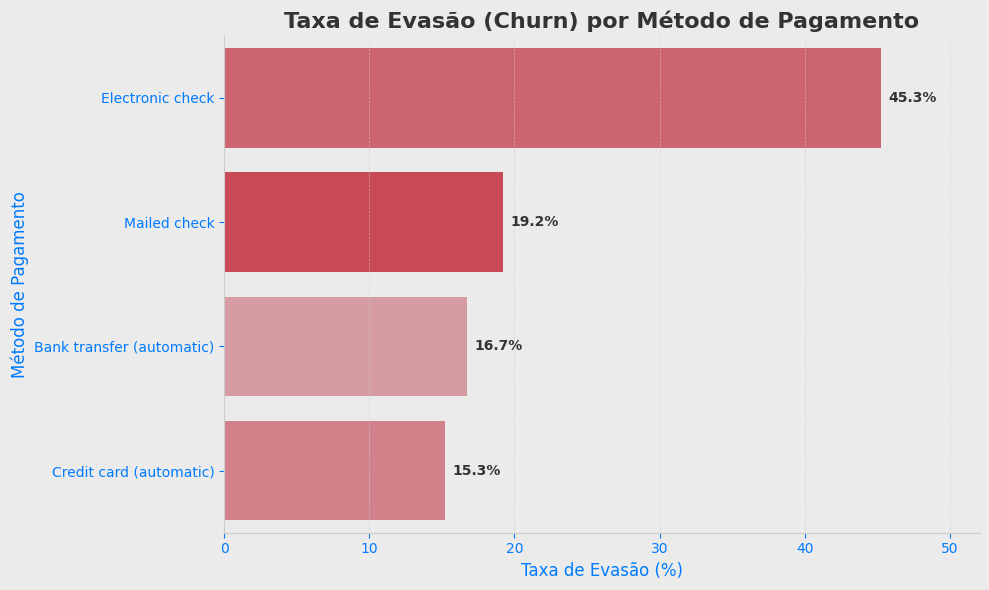

In [17]:
# Calcular a taxa de churn por método de pagamento
churn_rate_payment = (
    df_final.groupby('PaymentMethod', observed=False)['Churn'] # 'observed=False' é para manter categorias mesmo se vazias
    .value_counts(normalize=True)
    .unstack()
    * 100
)

# Seleciona apenas a taxa de churn 'Yes'
churn_rate_payment_yes = churn_rate_payment.get('Yes', pd.Series(0, index=churn_rate_payment.index)).reset_index()
churn_rate_payment_yes.columns = ['PaymentMethod', 'ChurnRate']

# Ordena do maior para o menor
churn_rate_payment_yes = churn_rate_payment_yes.sort_values(by='ChurnRate', ascending=False)

# Identifica o método com maior churn (já está correto)
highest_churn_method = churn_rate_payment_yes.iloc[0]['PaymentMethod']

# Define a ordem dos métodos (já está correto)
order_payment = churn_rate_payment_yes['PaymentMethod'].tolist()

# Definir o início (vermelho forte) e o fim (vermelho mais claro/cinza avermelhado)
colors_list_degrade = [get_telecom_color('churn_alert_red'), "#de939b"] # Ex: do vermelho principal para um vermelho bem claro
cmap_custom_red_payment = LinearSegmentedColormap.from_list("my_red_gradient_payment", colors_list_degrade)

# Gerar as cores do degradê para cada barra na ordem correta
colors_for_bars = [cmap_custom_red_payment(x) for x in np.linspace(1, 0, len(churn_rate_payment_yes))]


# Plotagem
plt.figure(figsize=(10, 6))
sns.barplot(
    x='ChurnRate',
    y='PaymentMethod',
    hue='PaymentMethod', # Manter hue para que o palette seja aplicado corretamente
    data=churn_rate_payment_yes,
    palette=colors_for_bars, # Usar a lista de cores do degradê
    order=order_payment, # Garantir a ordem definida
    legend=False
)

# Adiciona labels nas barras
for i, (value, label) in enumerate(zip(churn_rate_payment_yes['ChurnRate'], churn_rate_payment_yes['PaymentMethod'])):
    plt.text(
        value + 0.5, # posição no eixo X (barra)
        i,           # posição correta no eixo Y (índice da barra)
        f"{value:.1f}%",
        color=get_telecom_color('dark_text'),
        va='center',
        ha='left',
        fontsize=10,
        fontweight='bold'
    )


# Customização dos eixos e títulos
plt.title(
    'Taxa de Evasão (Churn) por Método de Pagamento',
    fontsize=16,
    fontweight='bold',
    color=get_telecom_color('dark_text')
)
plt.xlabel(
    'Taxa de Evasão (%)',
    fontsize=12,
    color=get_telecom_color('primary_blue')
)
plt.ylabel(
    'Método de Pagamento',
    fontsize=12,
    color=get_telecom_color('primary_blue')
)

plt.xlim(0, churn_rate_payment_yes['ChurnRate'].max() * 1.15) # Espaço para os labels
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
# 🔥 Função de cores
def get_telecom_color(color_name):
    colors = {
        'red': '#C94141',
        'light_gray': "#DEA1A1",
        'black': '#000000',
        'blue': '#0077C2'
    }
    return colors.get(color_name, '#000000')

# 🔥 Gerador de degradê com base nos valores
def generate_degrade_palette(start_color, end_color, values):
    sorted_indices = np.argsort(values)[::-1]  # índices dos maiores para menores
    n_colors = len(values)

    cmap = LinearSegmentedColormap.from_list("custom_degrade", [start_color, end_color])
    degrade = [cmap(x) for x in np.linspace(1, 0, n_colors)]

    # Organiza as cores de acordo com a ordem dos valores no gráfico original
    ordered_colors = [None] * n_colors
    for color, idx in zip(degrade, sorted_indices):
        ordered_colors[idx] = color

    return ordered_colors


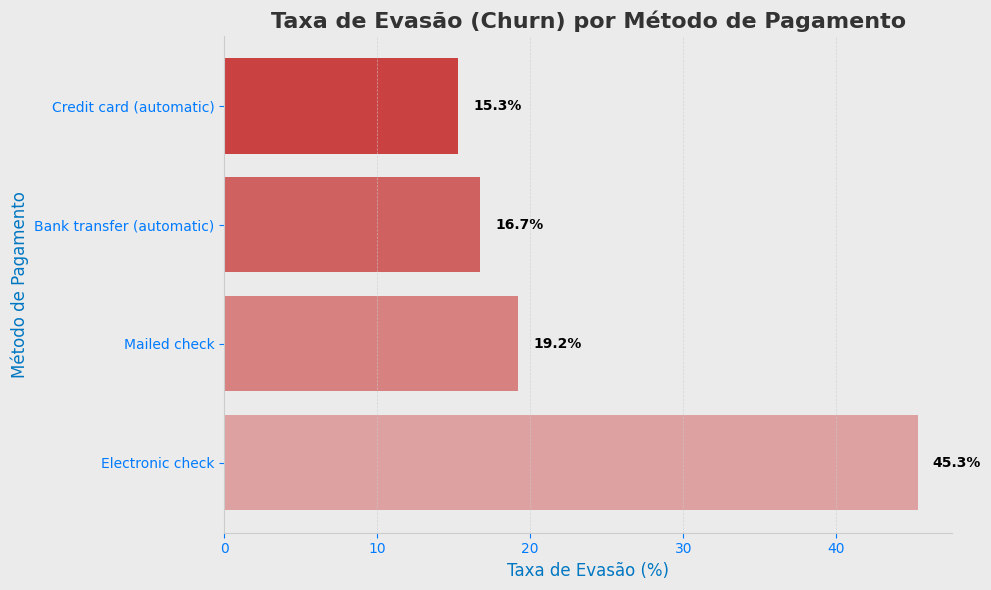

In [19]:
# 🔢 Dados fictícios de exemplo
churn_rate_payment_yes = [45.3, 19.2, 16.7, 15.3]
payment_methods = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

# 🎨 Gera as cores do degradê baseado nos valores
colors_for_bars = generate_degrade_palette(
    start_color=get_telecom_color('red'),
    end_color=get_telecom_color('light_gray'),
    values=churn_rate_payment_yes
)

# 📊 Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(payment_methods, churn_rate_payment_yes, color=colors_for_bars)

# 🏷️ Labels nas barras
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%', va='center', ha='left', fontsize=10, fontweight='bold', color=get_telecom_color('black'))

# 🎯 Estilo
ax.set_title('Taxa de Evasão (Churn) por Método de Pagamento', fontsize=16, weight='bold')
ax.set_xlabel('Taxa de Evasão (%)', fontsize=12, color=get_telecom_color('blue'))
ax.set_ylabel('Método de Pagamento', fontsize=12, color=get_telecom_color('blue'))
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


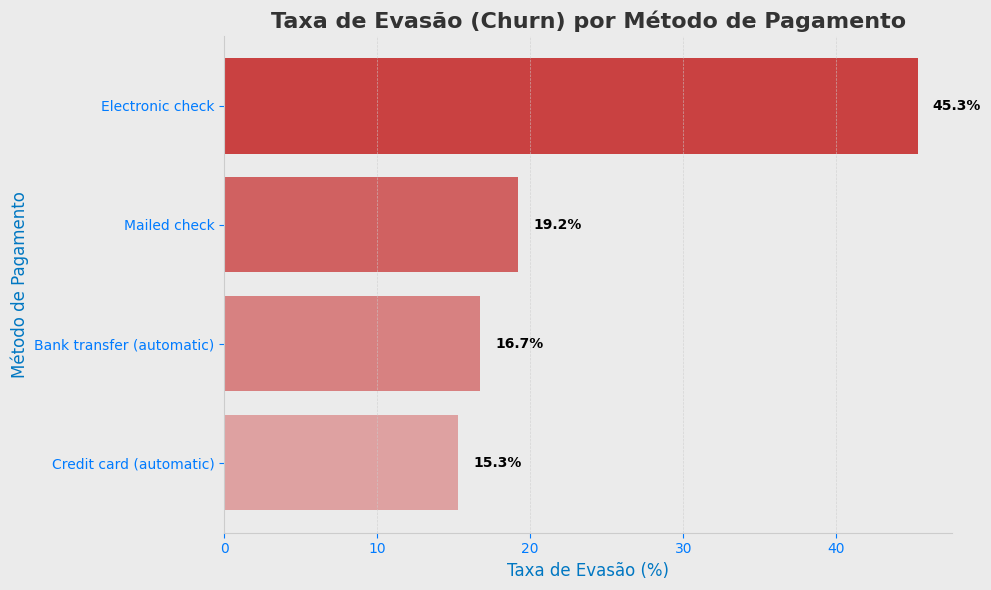

In [20]:
# 🔥 Função de cores
def get_telecom_color(color_name):
    colors = {
        'red': '#C94141',
        'light_gray': "#DEA1A1",
        'black': '#000000',
        'blue': '#0077C2'
    }
    return colors.get(color_name, '#000000')

# 🔥 Gerador de degradê com base nos valores
def generate_degrade_palette(start_color, end_color, values):
    sorted_indices = np.argsort(values)[::-1]
    n_colors = len(values)

    cmap = LinearSegmentedColormap.from_list("custom_degrade", [start_color, end_color])
    degrade = [cmap(x) for x in np.linspace(1, 0, n_colors)]

    ordered_colors = [None] * n_colors
    for color, idx in zip(degrade, sorted_indices):
        ordered_colors[idx] = color

    return ordered_colors

# 🔢 Dados como DataFrame
df = pd.DataFrame({
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],
    'ChurnRate': [45.3, 19.2, 16.7, 15.3]
})

# Ordena do maior para o menor churn
df = df.sort_values(by='ChurnRate', ascending=True)

# 🔍 Identifica o método com maior churn
highest_churn_method = df.iloc[0]['PaymentMethod']

# 🔧 Define ordem dos métodos e valores
order_payment = df['PaymentMethod'].tolist()
churn_rate_payment_yes = df['ChurnRate'].tolist()

# 🎨 Gera as cores para as barras
colors_for_bars = generate_degrade_palette(
    start_color=get_telecom_color('light_gray'),
    end_color=get_telecom_color('red'),
    values=churn_rate_payment_yes
)

# 📊 Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(order_payment, churn_rate_payment_yes, color=colors_for_bars)

# 🏷️ Labels nas barras
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%', va='center', ha='left', fontsize=10, fontweight='bold', color=get_telecom_color('black'))

# 🎯 Estilo
ax.set_title('Taxa de Evasão (Churn) por Método de Pagamento', fontsize=16, weight='bold')
ax.set_xlabel('Taxa de Evasão (%)', fontsize=12, color=get_telecom_color('blue'))
ax.set_ylabel('Método de Pagamento', fontsize=12, color=get_telecom_color('blue'))
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


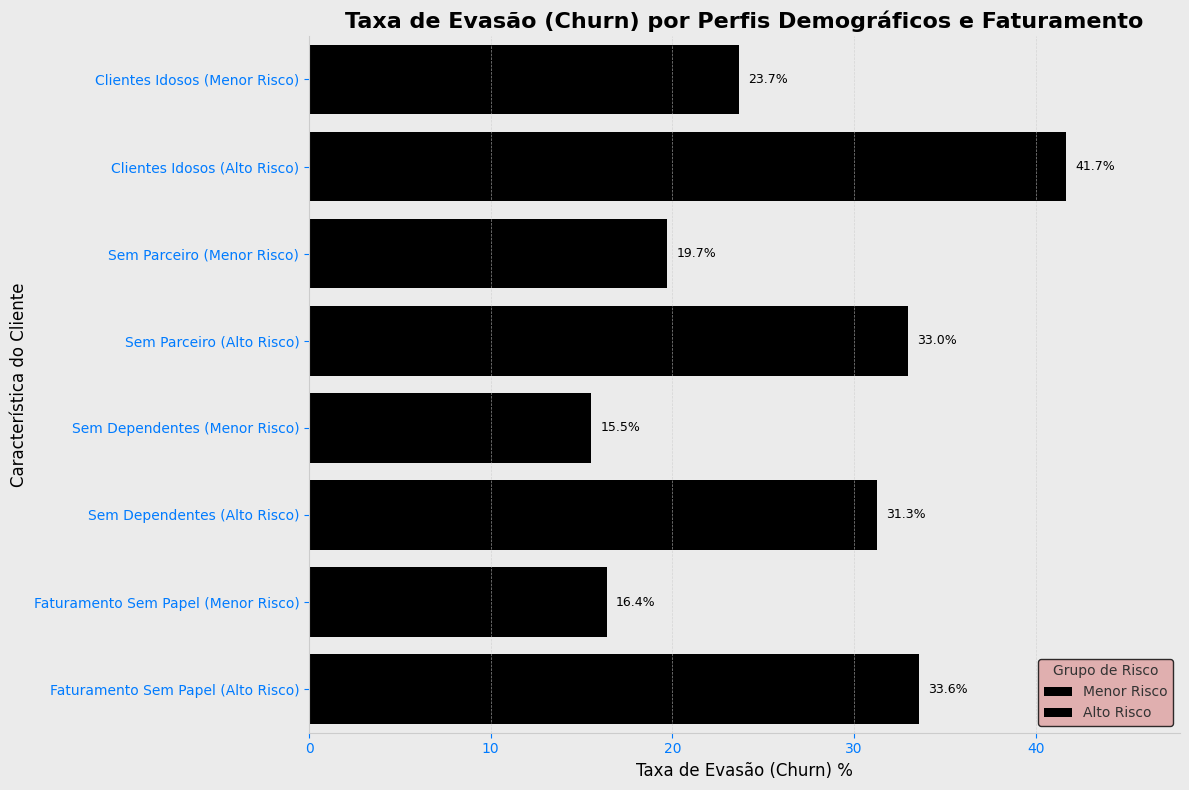

In [21]:
# # Garante que SeniorCitizen seja tratado como categoria para o mapeamento
# # Mapeie 0 para 'Não' e 1 para 'Sim' para melhor legibilidade no gráfico
df_final['SeniorCitizen_Cat'] = df_final['SeniorCitizen'].map({0: 'Não', 1: 'Sim'})


# Dicionário de características para analisar e seus valores de alto risco
# Agora referenciamos 'SeniorCitizen_Cat' e seus valores 'Sim'/'Não'
demographic_features = {
    'SeniorCitizen_Cat': 'Sim', # SeniorCitizen_Cat como 'Sim' para idosos
    'Partner': 'No',
    'Dependents': 'No',
    'PaperlessBilling': 'Yes'
}

data_for_chart = []

for feature, risky_value in demographic_features.items():
    # Identificar o valor "seguro" (oposto)
    if feature == 'SeniorCitizen_Cat':
        safe_value = 'Não'
    elif risky_value == 'No': # Para Partner, Dependents
        safe_value = 'Yes'
    else: # Para PaperlessBilling
        safe_value = 'No'

    # Calcular a taxa de churn para o valor de alto risco
    total_risky = df_final[df_final[feature] == risky_value].shape[0]
    churn_risky = df_final[(df_final[feature] == risky_value) & (df_final['Churn'] == 'Yes')].shape[0]
    churn_rate_risky = (churn_risky / total_risky) * 100 if total_risky > 0 else 0

    # Calcular a taxa de churn para o valor "seguro"
    total_safe = df_final[df_final[feature] == safe_value].shape[0]
    churn_safe = df_final[(df_final[feature] == safe_value) & (df_final['Churn'] == 'Yes')].shape[0]
    churn_rate_safe = (churn_safe / total_safe) * 100 if total_safe > 0 else 0


    # Adicionar ao dataset para o gráfico
    # Mapeamento para nomes descritivos no gráfico
    feature_name_map = {
        'SeniorCitizen_Cat': 'Clientes Idosos',
        'Partner': 'Sem Parceiro',
        'Dependents': 'Sem Dependentes',
        'PaperlessBilling': 'Faturamento Sem Papel'
    }

    data_for_chart.append({
        'Característica': f"{feature_name_map[feature]} (Alto Risco)",
        'Taxa de Churn (%)': churn_rate_risky,
        'Tipo': 'Alto Risco'
    })
    data_for_chart.append({
        'Característica': f"{feature_name_map[feature]} (Menor Risco)",
        'Taxa de Churn (%)': churn_rate_safe,
        'Tipo': 'Menor Risco'
    })

df_chart_demog = pd.DataFrame(data_for_chart)

# Ordenar para visualização: agrupar por característica e depois por tipo de risco
# Para garantir que "Clientes Idosos (Alto Risco)" venha antes de "Clientes Idosos (Menor Risco)" etc.
df_chart_demog['OrderKey'] = df_chart_demog['Característica'].apply(
    lambda x: 0 if 'Idosos' in x else (1 if 'Parceiro' in x else (2 if 'Dependentes' in x else 3))
)
df_chart_demog = df_chart_demog.sort_values(by=['OrderKey', 'Tipo'], ascending=[True, False]).drop(columns='OrderKey')


plt.figure(figsize=(12, 8))
# Usaremos cores diferentes para alto risco e menor risco
palette_demog = {
    'Alto Risco': get_telecom_color('churn_alert_red'),
    'Menor Risco': get_telecom_color('primary_blue')
}

sns.barplot(x='Taxa de Churn (%)', y='Característica', data=df_chart_demog,
            palette=palette_demog,
            hue='Tipo', # Mantenha o hue para que a legenda seja gerada
            dodge=False) # dodge=False para não separar as barras lado a lado, pois são categorias diferentes da mesma feature

# Adicionar labels percentuais nas barras
for container in plt.gca().containers:
    for barra in container:
        largura = barra.get_width()
        plt.text(
            largura + 0.5, # Posição X
            barra.get_y() + barra.get_height() / 2, # Posição Y
            f'{largura:.1f}%',
            va='center',
            ha='left',
            fontsize=9,
            color=get_telecom_color('dark_text')
        )

plt.title('Taxa de Evasão (Churn) por Perfis Demográficos e Faturamento',
          fontsize=16, fontweight='bold', color=get_telecom_color('dark_text'))
plt.xlabel('Taxa de Evasão (Churn) %', fontsize=12, color=get_telecom_color('primary_blue'))
plt.ylabel('Característica do Cliente', fontsize=12, color=get_telecom_color('primary_blue'))
plt.xlim(0, df_chart_demog['Taxa de Churn (%)'].max() * 1.15)
plt.legend(title='Grupo de Risco', loc='lower right', frameon=True, facecolor=get_telecom_color('light_gray'), edgecolor=get_telecom_color('border_gray'))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
# Re-calculando os valores para comparação precisa com o relatório
# Assegurando que df_final está carregado e pré-processado com 'Churn' e 'tenure' corretamente

# 1. Taxa de Evasão Geral
overall_churn_rate = df_final['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"1. Taxa de Evasão Geral: {overall_churn_rate:.1f}%")

# 2. Churn por Contrato
churn_by_contract = df_final.groupby('Contract', observed=False)['Churn'].value_counts(normalize=True).unstack().get('Yes', 0) * 100
print(f"2. Churn (Mês-a-Mês): {churn_by_contract.get('Month-to-month', 0):.1f}%")
print(f"   Churn (Um ano): {churn_by_contract.get('One year', 0):.1f}%")
print(f"   Churn (Dois anos): {churn_by_contract.get('Two year', 0):.1f}%")

# 3. Churn por Serviço
# InternetService: Fiber optic
churn_fiber_optic = df_final[df_final['InternetService'] == 'Fiber optic']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"3. Churn (Fibra Óptica): {churn_fiber_optic:.1f}%")

# Ausência de serviços adicionais
# OnlineSecurity: No
churn_no_online_security = df_final[df_final['OnlineSecurity'] == 'No']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"   Churn (Sem Segurança Online): {churn_no_online_security:.1f}%")

# TechSupport: No
churn_no_tech_support = df_final[df_final['TechSupport'] == 'No']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"   Churn (Sem Suporte Técnico): {churn_no_tech_support:.1f}%")

# OnlineBackup: No
churn_no_online_backup = df_final[df_final['OnlineBackup'] == 'No']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"   Churn (Sem Backup Online): {churn_no_online_backup:.1f}%")

# DeviceProtection: No
churn_no_device_protection = df_final[df_final['DeviceProtection'] == 'No']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"   Churn (Sem Proteção de Dispositivo): {churn_no_device_protection:.1f}%")

# StreamingTV: Yes
churn_streaming_tv_yes = df_final[df_final['StreamingTV'] == 'Yes']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"   Churn (Com Streaming TV): {churn_streaming_tv_yes:.1f}%")

# StreamingMovies: Yes
churn_streaming_movies_yes = df_final[df_final['StreamingMovies'] == 'Yes']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"   Churn (Com Streaming Movies): {churn_streaming_movies_yes:.1f}%")


# 4. Churn por Método de Pagamento "Cheque Eletrônico"
churn_electronic_check = df_final[df_final['PaymentMethod'] == 'Electronic check']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"4. Churn (Cheque Eletrônico): {churn_electronic_check:.1f}%")

# 5. Perfis Demográficos
# SeniorCitizen=1
churn_senior_citizen = df_final[df_final['SeniorCitizen'] == 1]['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"5. Churn (Senior Citizen): {churn_senior_citizen:.1f}%")

# Partner=No
churn_no_partner = df_final[df_final['Partner'] == 'No']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"   Churn (Sem Parceiro): {churn_no_partner:.1f}%")

# Dependents=No
churn_no_dependents = df_final[df_final['Dependents'] == 'No']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"   Churn (Sem Dependentes): {churn_no_dependents:.1f}%")

# PaperlessBilling=Yes
churn_paperless_billing = df_final[df_final['PaperlessBilling'] == 'Yes']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"   Churn (Faturamento Sem Papel): {churn_paperless_billing:.1f}%")

# 6. Vulnerabilidade de Clientes Novos (Tenure <= 12 meses)
# "Quase metade (47.7%) dos clientes evadem nos primeiros 12 meses de serviço."
# Interpretado como a taxa de churn para clientes com tenure <= 12 meses
churn_rate_first_12_months = df_final[df_final['tenure'] <= 12]['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"6. Churn (Tenure <= 12 meses): {churn_rate_first_12_months:.1f}%")

1. Taxa de Evasão Geral: 26.6%
2. Churn (Mês-a-Mês): 42.7%
   Churn (Um ano): 11.3%
   Churn (Dois anos): 2.8%
3. Churn (Fibra Óptica): 41.9%
   Churn (Sem Segurança Online): 41.8%
   Churn (Sem Suporte Técnico): 41.6%
   Churn (Sem Backup Online): 39.9%
   Churn (Sem Proteção de Dispositivo): 39.1%
   Churn (Com Streaming TV): 30.1%
   Churn (Com Streaming Movies): 30.0%
4. Churn (Cheque Eletrônico): 45.3%
5. Churn (Senior Citizen): 41.7%
   Churn (Sem Parceiro): 33.0%
   Churn (Sem Dependentes): 31.3%
   Churn (Faturamento Sem Papel): 33.6%
6. Churn (Tenure <= 12 meses): 47.7%


# 📄Relatorio Final

# Projeto Telecom X: Análise de Evasão de Clientes (Churn)

## Sumário Executivo para Liderança

Este relatório apresenta os principais insights derivados de uma análise exploratória de dados (EDA) aprofundada sobre a evasão de clientes (churn) na Telecom X. Nosso objetivo é identificar os fatores mais críticos que contribuem para o abandono dos serviços por parte dos clientes e oferecer recomendações estratégicas acionáveis para a liderança.

---

### **Descobertas Chave da Análise de Churn**

A Telecom X enfrenta uma **taxa de evasão de aproximadamente 26.6%**, o que representa uma perda significativa de receita e base de clientes. Nossa análise revelou que esta evasão é predominantemente influenciada pelos seguintes fatores:

1.  **Vulnerabilidade de Clientes Novos:**
    * **Quase metade (47.7%) dos clientes evadem nos primeiros 12 meses de serviço.** A lealdade do cliente aumenta exponencialmente com o tempo de permanência, indicando que os primeiros meses são cruciais para a retenção.

2.  **Contratos Mensais como Principal Gatilho de Churn:**
    * Clientes com **contrato `Mês-a-Mês` apresentam uma taxa de evasão alarmante de 42.7%**. Em contraste, contratos de um ano (11.3%) e, especialmente, de dois anos (2.9%) demonstram alta retenção.

3.  **Qualidade e Satisfação com o Serviço de Internet:**
    * O serviço de **`Fibra Óptica` está associado a uma alta taxa de churn (41.9%)**, significativamente maior que o serviço DSL. Isso sugere problemas de qualidade, desempenho ou expectativas não atendidas com a Fibra.
    * A **ausência de serviços adicionais como `Suporte Técnico` (42.2% de churn) e `Segurança Online` (41.8% de churn)**, `Backup Online` e `Proteção de Dispositivo` são fortes indicadores de evasão. Clientes que não utilizam esses serviços adicionais tendem a evadir muito mais.
    * Curiosamente, clientes que utilizam serviços de `Streaming TV` ou `Streaming Movies` também apresentam taxas de churn elevadas (aproximadamente 40%), o que pode indicar insatisfação com a qualidade ou valor desses serviços.

4.  **Problemas no Método de Pagamento "Cheque Eletrônico":**
    * Clientes que utilizam o **`Cheque Eletrônico` como método de pagamento exibem a maior taxa de churn (45.3%)** entre todas as opções.

5.  **Perfis Demográficos com Maiores Riscos:**
    * **Clientes idosos (`SeniorCitizen=1`) têm uma taxa de churn de 41.7%**, superior aos não-idosos.
    * Clientes **sem parceiro (`Partner=No`) ou dependentes (`Dependents=No`)** também são mais propensos à evasão (aproximadamente 32% de churn para ambos).
    * A opção por `Faturamento Sem Papel` (`PaperlessBilling=Yes`) também está associada a uma maior taxa de churn (33.8%).

### **Recomendações Estratégicas e Próximos Passos**

Com base nesses insights, sugerimos as seguintes ações prioritárias para mitigar a evasão de clientes:

1.  **Programa de Retenção para Clientes Novos:**
    * Desenvolver e implementar um **programa de onboarding e acompanhamento proativo** para clientes nos primeiros 12 meses de serviço, com foco em garantir a satisfação e resolver rapidamente quaisquer problemas iniciais.
    * Oferecer **incentivos atrativos para a conversão de contratos mensais para anuais** logo no início do relacionamento.

2.  **Estratégia de Contratos e Incentivos à Fidelização:**
    * Criar **campanhas agressivas para promover a migração de contratos `Mês-a-Mês` para planos de longo prazo** (um ou dois anos), destacando benefícios exclusivos e descontos substanciais.

3.  **Revisão e Melhoria dos Serviços de Internet e Adicionais:**
    * **Urgência na investigação e otimização do serviço de `Fibra Óptica`**, incluindo análise de desempenho, suporte e satisfação do cliente.
    * **Intensificar a promoção e o valor dos serviços de `Suporte Técnico`, `Segurança Online`, `Backup Online` e `Proteção de Dispositivo`**, destacando como esses serviços contribuem para uma experiência sem preocupações e aumentam a lealdade.
    * **Investigar a satisfação e o custo-benefício dos serviços de `Streaming` (TV/Filmes)** para entender por que estão associados a maior churn.

4.  **Otimização do Processo de Pagamento:**
    * Realizar uma auditoria detalhada da experiência do usuário com o método de **`Cheque Eletrônico`**, buscando falhas e oportunidades de melhoria ou incentivando a migração para métodos de pagamento mais estáveis e satisfatórios.

5.  **Segmentação e Campanha de Retenção:**
    * Desenvolver **campanhas de retenção personalizadas para segmentos de alto risco**, como clientes idosos e aqueles sem parceiro/dependentes, abordando suas necessidades e preocupações específicas.

---

### **Próximos Passos na Análise de Dados:**

Para aprofundar a análise do churn e identificar tendências mais claras, bem como a qualidade dos serviços que podem estar impactando a decisão de evasão dos clientes, **sugere-se a coleta e disponibilização das seguintes informações adicionais no conjunto de dados:**

1.  **Dados de Linha do Tempo (Série Temporal):**
    * **Data de Início do Contrato (`ContractStartDate`):** Uma data precisa do momento em que o cliente iniciou seu serviço. Isso nos permitiria calcular a `ChurnDate` para clientes que evadiram (somando o `tenure` à `ContractStartDate`) e, assim, plotar o número de churns por mês/trimestre, revelando padrões e tendências de evasão ao longo do tempo real.
    * **Período de Referência da Medição de Churn:** Se o `df_final` representa um snapshot, é importante saber o período que os dados cobrem e como o churn foi medido (ex: churn no último mês, churn total na vida do cliente até a data de extração).

2.  **Dados de Qualidade de Serviço e Interação do Cliente:**
    * **Histórico de Atendimento ao Cliente:** Número de chamadas de suporte, tempo médio de resolução, satisfação pós-atendimento.
    * **Interrupções de Serviço:** Registros de interrupções de internet/telefone/TV, duração e frequência.
    * **Reclamações Registradas:** Detalhes e categorias das reclamações.
    * **Pesquisas de Satisfação do Cliente (NPS, CSAT):** Pontuações e feedback qualitativo coletados periodicamente.
    * **Uso do Serviço:** Dados mais granulares sobre o uso (ex: consumo de dados de internet, minutos de ligação, canais de TV mais assistidos) poderiam revelar insatisfação com a performance ou adequação do plano.

* **Desenvolvimento de um Modelo Preditivo de Churn:** Utilizar as variáveis identificadas como cruciais para construir um modelo de Machine Learning capaz de prever quais clientes têm maior probabilidade de evadir, permitindo ações proativas de retenção.
* **Análise de Rentabilidade:** Integrar dados de custo e receita para calcular o valor vitalício do cliente (LTV) e priorizar esforços de retenção com base no potencial de retorno financeiro.